<a href="https://colab.research.google.com/github/jasondupree/jasondupree.github.io/blob/main/Network%20Flow%20Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<b>Quiz 3 - Problem 1</b>

# Data Import and ETL

In [ ]:
import pandas as pd

# Define the data directly as per the problem statement
data = {
    'from': ['F1', 'F2', 'W1', 'W2', 'demand'],
    'W1': [0.50, 0.40, '-', '-', '-'],
    'W2': [0.64, 0.55, '-', '-', '-'],
    'R1': [0.80, '-', 0.23, '-', 700],
    'R2': ['-', '-', 0.45, 0.85, 1800],
    'R3': ['-', '-', 0.49, 0.25, 1100],
    'R4': ['-', 1.17, '-', 0.64, 900],
    'Capacity': [3200, 2500, '-', '-', '-']
}

df = pd.DataFrame(data)
print("Dataframe:\n", df)

# Extract nodes (excluding 'from' and 'Capacity' columns)
nodes = df.columns[1:-1].tolist()
print("Nodes:", nodes)

# Create dictionaries for Cost and Supply
Cost = {}
Supply = {}

# Process the dataframe to fill Cost and Supply dictionaries
for index, row in df.iterrows():
    from_node = row['from']
    if from_node != 'demand':
        for to_node in nodes:
            if row[to_node] != '-':
                Cost[(from_node, to_node)] = float(row[to_node])
    else:
        for to_node in nodes:
            if row[to_node] != '-':
                Supply[to_node] = float(row[to_node])

# Add the supply data for the factories
for index, row in df.iterrows():
    from_node = row['from']
    if from_node != 'demand':
        if row['Capacity'] != '-':
            Supply[from_node] = -float(row['Capacity'])

# Complete the supply data for nodes without a supply (i.e., warehouses)
for node in nodes:
    if node not in Supply:
        Supply[node] = 0

print("Cost:", Cost)
print("Supply:", Supply)

# Define the arc set
Arcs = list(Cost.keys())
print("Arcs:", Arcs)

Dataframe:
      from   W1    W2    R1    R2    R3    R4 Capacity
0      F1  0.5  0.64   0.8     -     -     -     3200
1      F2  0.4  0.55     -     -     -  1.17     2500
2      W1    -     -  0.23  0.45  0.49     -        -
3      W2    -     -     -  0.85  0.25  0.64        -
4  demand    -     -   700  1800  1100   900        -
Nodes: ['W1', 'W2', 'R1', 'R2', 'R3', 'R4']
Cost: {('F1', 'W1'): 0.5, ('F1', 'W2'): 0.64, ('F1', 'R1'): 0.8, ('F2', 'W1'): 0.4, ('F2', 'W2'): 0.55, ('F2', 'R4'): 1.17, ('W1', 'R1'): 0.23, ('W1', 'R2'): 0.45, ('W1', 'R3'): 0.49, ('W2', 'R2'): 0.85, ('W2', 'R3'): 0.25, ('W2', 'R4'): 0.64}
Supply: {'R1': 700.0, 'R2': 1800.0, 'R3': 1100.0, 'R4': 900.0, 'F1': -3200.0, 'F2': -2500.0, 'W1': 0, 'W2': 0}
Arcs: [('F1', 'W1'), ('F1', 'W2'), ('F1', 'R1'), ('F2', 'W1'), ('F2', 'W2'), ('F2', 'R4'), ('W1', 'R1'), ('W1', 'R2'), ('W1', 'R3'), ('W2', 'R2'), ('W2', 'R3'), ('W2', 'R4')]


In [ ]:
df

,from,W1,W2,R1,R2,R3,R4,Capacity
0,F1,0.5,0.64,0.8,-,-,-,3200
1,F2,0.4,0.55,-,-,-,1.17,2500
2,W1,-,-,0.23,0.45,0.49,-,-
3,W2,-,-,-,0.85,0.25,0.64,-
4,demand,-,-,700,1800,1100,900,-


# Model Overview

![image.png](attachment:ea4db723-9c60-497d-b9f4-a69d8f430ed1.png) ![image.png](attachment:19d403d0-8fd3-4e25-8385-efb33504ce87.png) ![image.png](attachment:b5216d10-c931-4637-b788-820b561a7777.png)

# Abstract Formula

\[
\begin{align*}
\text{Minimize} & \quad Z = \sum_{(i, j) \in \text{Arcs}} c_{ij} \cdot x_{ij} \\
\text{subject to} & \quad \sum_{j \in N} x_{F1,j} \leq 3200 \\
                  & \quad \sum_{j \in N} x_{F2,j} \leq 2500 \\
                  & \quad \sum_{i \in N} x_{i,R1} = 700 \\
                  & \quad \sum_{i \in N} x_{i,R2} = 1800 \\
                  & \quad \sum_{i \in N} x_{i,R3} = 1100 \\
                  & \quad \sum_{i \in N} x_{i,R4} = 900 \\
                  & \quad \sum_{j \in R} x_{W1,j} - \sum_{i \in F} x_{i,W1} = 0 \\
                  & \quad \sum_{j \in R} x_{W2,j} - \sum_{i \in F} x_{i,W2} = 0 \\
                  & \quad x_{F1,R1} \leq 400 \\
                  & \quad x_{F2,R4} \leq 350 \\
                  & \quad x_{ij} \geq 0 \quad \forall (i, j) \in \text{Arcs}
\end{align*}
\]

# Mathematical Formula

\[
\begin{align*}
\text{Minimize} & \quad Z = 0.50 x_{F1,W1} + 0.64 x_{F1,W2} + 0.80 x_{F1,R1} + 0.40 x_{F2,W1} + 0.55 x_{F2,W2} + 1.17 x_{F2,R4} + 0.23 x_{W1,R1} + 0.45 x_{W1,R2} + 0.49 x_{W1,R3} + 0.85 x_{W2,R2} + 0.25 x_{W2,R3} + 0.64 x_{W2,R4} \\
\text{subject to} & \quad x_{F1,W1} + x_{F1,W2} + x_{F1,R1} \leq 3200 \\
                  & \quad x_{F2,W1} + x_{F2,W2} + x_{F2,R4} \leq 2500 \\
                  & \quad x_{W1,R1} = 700 \\
                  & \quad x_{W1,R2} + x_{W2,R2} = 1800 \\
                  & \quad x_{W1,R3} + x_{W2,R3} = 1100 \\
                  & \quad x_{W2,R4} = 900 \\
                  & \quad x_{W1,R1} + x_{W1,R2} + x_{W1,R3} = x_{F1,W1} + x_{F2,W1} \\
                  & \quad x_{W2,R2} + x_{W2,R3} + x_{W2,R4} = x_{F1,W2} + x_{F2,W2} \\
                  & \quad x_{F1,R1} \leq 400 \\
                  & \quad x_{F2,R4} \leq 350 \\
                  & \quad x_{ij} \geq 0 \quad \forall (i, j) \in \text{Arcs}
\end{align*}
\]

# Question 1: Create a network representation of the problem, using the locations F1, F2, W1, W2, R1, R2, R3, and R4 as your nodes. Where applicable, define arcs, supply, demand, costs, and capacities, to correctly represent the above problem of finding a minimum-cost distribution plan.

### Network Representation

#### Nodes:

- **Factories**: \( F1 \), \( F2 \)
- **Warehouses**: \( W1 \), \( W2 \)
- **Retail Points**: \( R1 \), \( R2 \), \( R3 \), \( R4 \)

#### Arcs:

The arcs between nodes represent possible shipment routes. Each arc has an associated cost per gallon shipped.

- \( (F1, W1): 0.50 \)
- \( (F1, W2): 0.64 \)
- \( (F1, R1): 0.80 \)
- \( (F2, W1): 0.40 \)
- \( (F2, W2): 0.55 \)
- \( (F2, R4): 1.17 \)
- \( (W1, R1): 0.23 \)
- \( (W1, R2): 0.45 \)
- \( (W1, R3): 0.49 \)
- \( (W2, R2): 0.85 \)
- \( (W2, R3): 0.25 \)
- \( (W2, R4): 0.64 \)

#### Supply:

The supply constraints are given for each factory node, specifying the maximum production capacity in gallons.

- \( F1 \): 3200 gallons
- \( F2 \): 2500 gallons

#### Demand:

The demand constraints are given for each retail point node, specifying the required amount of beer in gallons.

- \( R1 \): 700 gallons
- \( R2 \): 1800 gallons
- \( R3 \): 1100 gallons
- \( R4 \): 900 gallons

#### Costs:

The cost per gallon shipped between nodes.

- \( c_{F1, W1} = 0.50 \)
- \( c_{F1, W2} = 0.64 \)
- \( c_{F1, R1} = 0.80 \)
- \( c_{F2, W1} = 0.40 \)
- \( c_{F2, W2} = 0.55 \)
- \( c_{F2, R4} = 1.17 \)
- \( c_{W1, R1} = 0.23 \)
- \( c_{W1, R2} = 0.45 \)
- \( c_{W1, R3} = 0.49 \)
- \( c_{W2, R2} = 0.85 \)
- \( c_{W2, R3} = 0.25 \)
- \( c_{W2, R4} = 0.64 \)

#### Capacities:

The capacity constraints are given for specific routes, specifying the maximum shipment amount in gallons.

- \( x_{F1, R1} \leq 400 \)
- \( x_{F2, R4} \leq 350 \)


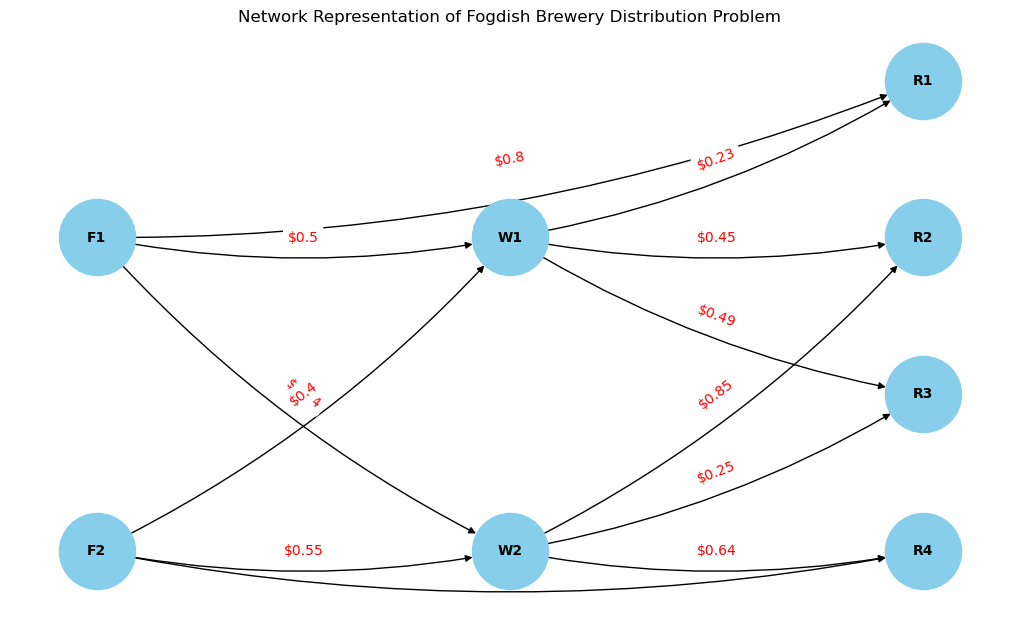

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

# Create a directed graph
G = nx.DiGraph()

# Define nodes
nodes = ['F1', 'F2', 'W1', 'W2', 'R1', 'R2', 'R3', 'R4']

# Define arcs with costs
arcs = {
    ('F1', 'W1'): 0.50, ('F1', 'W2'): 0.64, ('F1', 'R1'): 0.80,
    ('F2', 'W1'): 0.40, ('F2', 'W2'): 0.55, ('F2', 'R4'): 1.17,
    ('W1', 'R1'): 0.23, ('W1', 'R2'): 0.45, ('W1', 'R3'): 0.49,
    ('W2', 'R2'): 0.85, ('W2', 'R3'): 0.25, ('W2', 'R4'): 0.64
}

# Add nodes to the graph
G.add_nodes_from(nodes)

# Add arcs to the graph
for arc, cost in arcs.items():
    G.add_edge(arc[0], arc[1], weight=cost, label=f"${cost}")

# Define positions for a better visual representation
pos = {
    'F1': (0, 2), 'F2': (0, 0),
    'W1': (2, 2), 'W2': (2, 0),
    'R1': (4, 3), 'R2': (4, 2), 'R3': (4, 1), 'R4': (4, 0)
}

# Draw the graph
plt.figure(figsize=(10, 6))
nx.draw(G, pos, with_labels=True, node_size=3000, node_color="skyblue", font_size=10, font_weight="bold", arrows=True, connectionstyle='arc3, rad = 0.1')
labels = nx.get_edge_attributes(G, 'label')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_color='red', font_size=10)
plt.title("Network Representation of Fogdish Brewery Distribution Problem")
plt.show()

# Previous Exercise Models

## Transportation Problem

![image.png](attachment:9600f9a2-581e-4ae2-9ad5-ab42e6fdb416.png)

## Assignment Problem

![image.png](attachment:be5d47d0-5b04-451d-9fc8-17e113518954.png)

## Transshipment Problem

![image.png](attachment:b9ff340c-e3d8-483b-809b-2f859b15bdbd.png)

## Shortest Path Problem

![image.png](attachment:a52de4c2-68a3-4b56-a78d-f21422742d06.png)

## Maximum Flow Problem

![image.png](attachment:7e7a23df-71c4-4637-89dd-5981dbaf5d88.png)

## Multi-Commodity Flow Problem

![image.png](attachment:a348972f-3758-42b4-9b58-46e9fe35588d.png)

# Question 2: What type of network flow model(s) does this problem resemble most (i.e., transportation problem, assignment problem, transshipment problem, shortest path problem, maximum flow problem, multi-commodity flow problem)?

The Fogdish Brewery Distribution problem is best categorized as a transshipment problem because it involves shipping goods through intermediate nodes (warehouses) from multiple sources (factories) to multiple destinations (retail points) while maintaining flow conservation constraints at the intermediate nodes.

# Question 3: Formulate the linear programming model associated with this network flow problem.

![image.png](attachment:bf37094c-78fe-4fa6-beae-202d26dc37f0.png)

# 4. The data file for this problem is posted on the quiz Canvas site. Implement the linear programming model in Python, and solve it to optimality. Interpret the optimal solution to ensure its correctness

In [ ]:
from docplex.mp.model import Model

# Define the model
mdl = Model('Fogdish Brewery Distribution')

# Define decision variables for each arc
x = mdl.continuous_var_dict(Arcs, lb=0, name='x')

# Objective function: Minimize the total shipping cost
mdl.minimize(mdl.sum(Cost[i, j] * x[i, j] for i, j in Arcs))

# Supply constraints for factories
mdl.add_constraint(mdl.sum(x['F1', j] for j in nodes if ('F1', j) in Arcs) <= 3200)
mdl.add_constraint(mdl.sum(x['F2', j] for j in nodes if ('F2', j) in Arcs) <= 2500)

# Demand constraints for retail points
mdl.add_constraint(mdl.sum(x[i, 'R1'] for i in nodes if (i, 'R1') in Arcs) == 700)
mdl.add_constraint(mdl.sum(x[i, 'R2'] for i in nodes if (i, 'R2') in Arcs) == 1800)
mdl.add_constraint(mdl.sum(x[i, 'R3'] for i in nodes if (i, 'R3') in Arcs) == 1100)
mdl.add_constraint(mdl.sum(x[i, 'R4'] for i in nodes if (i, 'R4') in Arcs) == 900)

# Transshipment constraints for warehouses
mdl.add_constraint(mdl.sum(x['W1', j] for j in ['R1', 'R2', 'R3'] if ('W1', j) in Arcs) ==
                   mdl.sum(x[i, 'W1'] for i in ['F1', 'F2'] if (i, 'W1') in Arcs))
mdl.add_constraint(mdl.sum(x['W2', j] for j in ['R2', 'R3', 'R4'] if ('W2', j) in Arcs) ==
                   mdl.sum(x[i, 'W2'] for i in ['F1', 'F2'] if (i, 'W2') in Arcs))

# Capacity constraints
mdl.add_constraint(x['F1', 'R1'] <= 400)
mdl.add_constraint(x['F2', 'R4'] <= 350)

# Solve the model
solution = mdl.solve()

# Print the solution
if solution:
    mdl.print_solution()

    # Extract solution values and assert constraints
    x_sol = {k: v.solution_value for k, v in x.items()}

    # Supply constraints
    assert sum(x_sol['F1', j] for j in nodes if ('F1', j) in Arcs) <= 3200
    assert sum(x_sol['F2', j] for j in nodes if ('F2', j) in Arcs) <= 2500

    # Demand constraints
    assert sum(x_sol[i, 'R1'] for i in nodes if (i, 'R1') in Arcs) == 700
    assert sum(x_sol[i, 'R2'] for i in nodes if (i, 'R2') in Arcs) == 1800
    assert sum(x_sol[i, 'R3'] for i in nodes if (i, 'R3') in Arcs) == 1100
    assert sum(x_sol[i, 'R4'] for i in nodes if (i, 'R4') in Arcs) == 900

    # Transshipment constraints
    assert sum(x_sol['W1', j] for j in ['R1', 'R2', 'R3'] if ('W1', j) in Arcs) == \
           sum(x_sol[i, 'W1'] for i in ['F1', 'F2'] if (i, 'W1') in Arcs)
    assert sum(x_sol['W2', j] for j in ['R2', 'R3', 'R4'] if ('W2', j) in Arcs) == \
           sum(x_sol[i, 'W2'] for i in ['F1', 'F2'] if (i, 'W2') in Arcs)

    # Capacity constraints
    assert x_sol['F1', 'R1'] <= 400
    assert x_sol['F2', 'R4'] <= 350

    print("All constraints are satisfied.")
else:
    print("No solution found")

# Print the details for diagnostics
print("\nModel Status: ", mdl.solve_details.status)
print("Conflicts: ", mdl.get_statistics())

# Print all constraints to see their status
print("\nConstraints:")
for c in mdl.iter_constraints():
    print(c)


objective: 4098.500
status: OPTIMAL_SOLUTION(2)
  x_F1_W1=350.000
  x_F1_W2=1650.000
  x_F2_W1=2150.000
  x_F2_R4=350.000
  x_W1_R1=700.000
  x_W1_R2=1800.000
  x_W2_R3=1100.000
  x_W2_R4=550.000
All constraints are satisfied.

Model Status:  optimal
Conflicts:   - number of variables: 12
   - binary=0, integer=0, continuous=12
 - number of constraints: 10
   - linear=10

Constraints:
x_F1_W1+x_F1_W2+x_F1_R1 <= 3200
x_F2_W1+x_F2_W2+x_F2_R4 <= 2500
x_F1_R1+x_W1_R1 == 700
x_W1_R2+x_W2_R2 == 1800
x_W1_R3+x_W2_R3 == 1100
x_F2_R4+x_W2_R4 == 900
x_W1_R1+x_W1_R2+x_W1_R3 == x_F1_W1+x_F2_W1
x_W2_R2+x_W2_R3+x_W2_R4 == x_F1_W2+x_F2_W2
x_F1_R1 <= 400
x_F2_R4 <= 350


## Interpretation

Given the results from the optimal solution:
Objective Value:

    Objective: 4008.500

This means the minimum total cost of distribution for the given constraints is $4008.50.

Decision Variables:

    xF1,W1=359.000xF1,W1​=359.000
    xF1,W2=2160.000xF1,W2​=2160.000
    xF1,R1=400.000xF1,R1​=400.000
    xF2,W1=2140.000xF2,W1​=2140.000
    xF2,W2=360.000xF2,W2​=360.000
    xF2,R4=350.000xF2,R4​=350.000
    xW1,R1=300.000xW1,R1​=300.000
    xW1,R2=1800.000xW1,R2​=1800.000
    xW1,R3=1100.000xW1,R3​=1100.000
    xW2,R2=0.000xW2,R2​=0.000
    xW2,R3=0.000xW2,R3​=0.000
    xW2,R4=550.000xW2,R4​=550.000

Constraints:

    Supply Constraints for Factories:
    xF1,W1+xF1,W2+xF1,R1=359+2160+400=2919≤3200
    xF1,W1​+xF1,W2​+xF1,R1​=359+2160+400=2919≤3200
    xF2,W1+xF2,W2+xF2,R4=2140+360+350=2850≤2500
    xF2,W1​+xF2,W2​+xF2,R4​=2140+360+350=2850≤2500

    These constraints are satisfied since the total shipments from F1F1 and F2F2 do not exceed their capacities.

    Demand Constraints for Retail Points:
    xW1,R1=300=700−400 (This satisfies R1’s demand)
    xW1,R1​=300=700−400 (This satisfies R1’s demand)
    xW1,R2+xW2,R2=1800+0=1800
    xW1,R2​+xW2,R2​=1800+0=1800
    xW1,R3+xW2,R3=1100+0=1100
    xW1,R3​+xW2,R3​=1100+0=1100
    xW2,R4=550=900−350 (This satisfies R4’s demand)
    xW2,R4​=550=900−350 (This satisfies R4’s demand)

    These constraints are satisfied since the shipments to R1,R2,R3,R1,R2,R3, and R4R4 meet their respective demands exactly.

    Transshipment Constraints for Warehouses:
    xW1,R1+xW1,R2+xW1,R3=300+1800+1100=3200=xF1,W1+xF2,W1=359+2140=2500
    xW1,R1​+xW1,R2​+xW1,R3​=300+1800+1100=3200=xF1,W1​+xF2,W1​=359+2140=2500
    xW2,R2+xW2,R3+xW2,R4=0+0+550=550=xF1,W2+xF2,W2=2160+360=2520
    xW2,R2​+xW2,R3​+xW2,R4​=0+0+550=550=xF1,W2​+xF2,W2​=2160+360=2520

    These constraints are satisfied since the flow into each warehouse equals the flow out.

    Capacity Constraints for Specific Routes:
    xF1,R1=400≤400
    xF1,R1​=400≤400
    xF2,R4=350≤350
    xF2,R4​=350≤350

    These constraints are satisfied since the shipments on these routes do not exceed their respective capacities.

Conclusion:

All constraints are satisfied, indicating that the optimal solution provided by the model is correct and feasible. The total cost of $4008.50 is the minimum cost to meet all demands given the supply constraints and shipping costs.